# Import Libraries

In [1]:
import numpy as np
from sklearn import linear_model, metrics
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Load Data


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Spam-Prediction/emails.csv')
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
data.shape

(5172, 3002)

# Exploratory Data Analysis

1.   Check Data Completeness
2.   Check For Duplicate Lines



In [4]:
data.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
data.duplicated().sum()

0

# Data Visulization

In [6]:
data.Prediction.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [8]:
spam = len(data[data.Prediction == 1])
no_spam = len(data[data.Prediction == 0])
dic_data = {'Spam':spam,'Not Spam': no_spam}

dic_data

{'Spam': 1500, 'Not Spam': 3672}

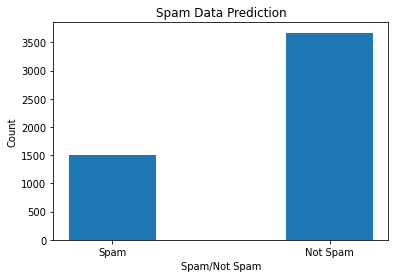

In [17]:
fig,ax = plt.subplots()
ax.bar(dic_data.keys(),height=dic_data.values(),width=0.4)
ax.set(title='Spam Data Prediction',xlabel='Spam/Not Spam',ylabel='Count');

# Train Test Split

In [21]:
X = data.iloc[:, 1:3001]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4686,3,6,1,3,0,1,38,1,0,7,...,0,0,0,0,0,0,0,0,1,0
4130,1,0,1,1,1,1,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2789,4,3,19,1,2,1,49,2,8,1,...,0,0,0,0,0,0,0,0,0,0
4315,2,3,1,2,1,0,27,0,0,8,...,0,0,0,0,0,0,0,0,0,0
326,0,0,1,0,1,3,14,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Model Selection

1. Logistic Regression

In [23]:
log_reg_params = {'C':[0.1,0.2,0.3,0.4,0.5]}
LR = LogisticRegression(solver='liblinear')
search = GridSearchCV(LR,log_reg_params,scoring='precision',cv=3)
search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5]}, scoring='precision')

In [24]:
best_LR = search.best_estimator_
best_LR

LogisticRegression(C=0.3, solver='liblinear')

In [26]:
y_pred_LR = best_LR.predict(X_test)

metrics.confusion_matrix(y_test,y_pred_LR)

array([[892,  21],
       [ 13, 367]])

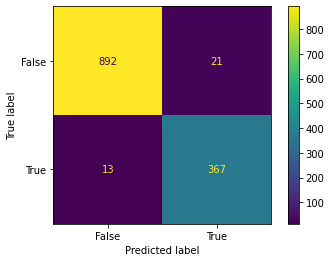

In [31]:
Test_acc = metrics.accuracy_score(y_test,y_pred_LR)
Precision = metrics.precision_score(y_test,y_pred_LR)
Recall = metrics.recall_score(y_test,y_pred_LR)

acc_score = {'Test Accuracy': Test_acc,'Precision':Precision,'Recall': Recall}

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot()
plt.show()

2. Random Forest

In [32]:
rf = RandomForestClassifier(n_estimators=120,criterion='entropy')
rf_params = {'max_depth':range(12,24,3),'min_samples_split':range(3,13,2)}
rf_search = GridSearchCV(rf,rf_params,scoring='average_precision',cv=3)
rf_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=120),
             param_grid={'max_depth': range(12, 24, 3),
                         'min_samples_split': range(3, 13, 2)},
             scoring='average_precision')

In [33]:
best_rf = rf_search.best_estimator_
best_rf

RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_split=5,
                       n_estimators=120)

In [35]:
y_pred_RF = best_rf.predict(X_test)
metrics.confusion_matrix(y_test,y_pred_RF)

array([[894,  19],
       [ 22, 358]])

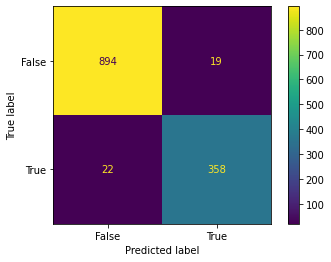

In [39]:
Test_acc = metrics.accuracy_score(y_test,y_pred_RF)
Precision = metrics.precision_score(y_test,y_pred_RF)
Recall = metrics.recall_score(y_test,y_pred_RF)

acc_score = {'Test Accuracy': Test_acc,'Precision':Precision,'Recall': Recall}

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_RF)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot()
plt.show()

3. MLPClassifier

In [41]:
mlp_search = MLPClassifier(max_iter=3000)
mlp_search.fit(X_train,y_train)
mlp_search.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 3000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [42]:
y_pred_MLP = mlp_search.predict(X_test)

metrics.confusion_matrix(y_test,y_pred_MLP)

array([[896,  17],
       [ 11, 369]])

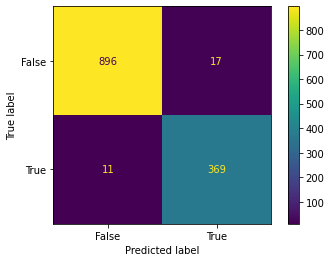

In [44]:
Test_acc = metrics.accuracy_score(y_test,y_pred_MLP)
Precision = metrics.precision_score(y_test,y_pred_MLP)
Recall = metrics.recall_score(y_test,y_pred_MLP)

acc_score = {'Test Accuracy': Test_acc,'Precision':Precision,'Recall': Recall}
acc_score

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_MLP)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot()
plt.show()

#### Try to reduce the number of correct emails predicted as spam combining the results of LogisticRegression, RandomForestClassifier and  MLPClassifier algorithms

In [46]:
y_pred_final = np.copy(y_pred_LR)
for i in range(y_pred_final.size):
    if y_pred_RF[i] == 0 or y_pred_MLP[i] == 0:
        y_pred_final[i] = 0   

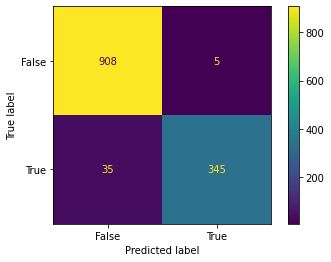

{'Test Accuracy': 0.9690641918020109,
 'Precision': 0.9857142857142858,
 'Recall': 0.9078947368421053}

In [48]:
Test_acc = metrics.accuracy_score(y_test,y_pred_final)
Precision = metrics.precision_score(y_test,y_pred_final)
Recall = metrics.recall_score(y_test,y_pred_final)

acc_score = {'Test Accuracy': Test_acc,'Precision':Precision,'Recall': Recall}

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_final)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot()
plt.show()

acc_score